#Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Stock_market/OHLC.csv")

# Convert 'Vol' feature to float
data['Vol'] = data['Vol'].str.replace(',', '').astype(float)

# Import datetime module to handle date
from datetime import datetime

# Extract date part from 'Date' feature and convert to datetime format
data['Date'] = pd.to_datetime(data['Date'].str.split('.').str[0])  # Extracting date part before ".csv" and converting to datetime

# Display the first few rows of the DataFrame
print(data.head())


   S.no  Symbol       Date   Open   High    Low  Close      Vol
0     0  ACEDBL 2012-01-01  114.0  113.0  112.0  113.0   1962.0
1     1  ACEDPO 2012-01-01  188.0  114.0  114.0  114.0  10000.0
2     2    ADBL 2012-01-01  115.0  115.0  113.0  114.0   1111.0
3     3    AHPC 2012-01-01  319.0  319.0  312.0  312.0    377.0
4     4   ALDBL 2012-01-01  102.0  101.0  101.0  101.0     30.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250901 entries, 0 to 250900
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   S.no    250901 non-null  int64         
 1   Symbol  250761 non-null  object        
 2   Date    250901 non-null  datetime64[ns]
 3   Open    250901 non-null  float64       
 4   High    250901 non-null  float64       
 5   Low     250901 non-null  float64       
 6   Close   250901 non-null  float64       
 7   Vol     250901 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.3+ MB


In [ ]:
data.describe()

,S.no,Date,Open,High,Low,Close,Vol
count,250901.000000,250901,250901.000000,250901.000000,250901.000000,250901.000000,2.509010e+05
mean,69.281685,2016-09-01 12:59:34.962236160,728.115518,738.121261,719.442406,729.287949,8.927889e+03
min,0.000000,2012-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,32.000000,2014-09-30 00:00:00,169.000000,171.000000,167.000000,170.000000,4.160000e+02
50%,65.000000,2016-11-29 00:00:00,350.000000,356.000000,346.000000,351.000000,1.822000e+03
75%,103.000000,2018-09-05 00:00:00,755.000000,768.000000,745.000000,757.000000,6.766000e+03
max,377.000000,2020-03-22 00:00:00,36000.000000,36000.000000,36000.000000,36000.000000,7.236375e+06
std,44.248010,NaN,1589.122378,1604.530323,1577.026589,1591.221102,4.665954e+04



# Data Preprocessing

In [ ]:

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Stock_market/OHLC.csv")

# Convert 'Vol' feature to float
data['Vol'] = data['Vol'].str.replace(',', '').astype(float)

# Extract date part from 'Date' feature and convert to datetime format
data['Date'] = pd.to_datetime(data['Date'].str.split('.').str[0])


## Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

## Fill or drop missing values if any
data.dropna(inplace=True)

# Add new features for EDA and modeling
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek


Missing values in each column:
 S.no        0
Symbol    140
Date        0
Open        0
High        0
Low         0
Close       0
Vol         0
dtype: int64


In [ ]:
import pandas as pd

# Function to print DataFrame information concisely
def print_dataframe_info(symbol, df):
    print(f"\nSymbol: {symbol}")
    print(f"- Number of rows: {len(df)}")

# Create a dictionary to store DataFrames for each unique symbol
symbol_dataframes = {symbol: group_data for symbol, group_data in data.groupby("Symbol")}

# Print information about the created DataFrames in a loop
total_unique_symbols = len(symbol_dataframes)
print(f"\nTotal Unique Symbols: {total_unique_symbols}")

for symbol, df in symbol_dataframes.items():
    print_dataframe_info(symbol, df)

# Extract the top 10 companies by the number of rows
top_10_companies = sorted(symbol_dataframes.items(), key=lambda item: len(item[1]), reverse=True)[:10]




Total Unique Symbols: 522

Symbol: ACEDBL
- Number of rows: 802

Symbol: ACEDPO
- Number of rows: 7

Symbol: ADBL
- Number of rows: 1911

Symbol: AFL
- Number of rows: 47

Symbol: AHPC
- Number of rows: 1879

Symbol: AIC
- Number of rows: 408

Symbol: AICPO
- Number of rows: 11

Symbol: AKBSL
- Number of rows: 72

Symbol: AKJCL
- Number of rows: 305

Symbol: AKPL
- Number of rows: 694

Symbol: ALBSL
- Number of rows: 253

Symbol: ALDBL
- Number of rows: 850

Symbol: ALICL
- Number of rows: 1845

Symbol: ALICLP
- Number of rows: 46

Symbol: ALICLPALIC
- Number of rows: 1

Symbol: AMFI
- Number of rows: 233

Symbol: APEX
- Number of rows: 422

Symbol: API
- Number of rows: 1029

Symbol: ARDBL
- Number of rows: 692

Symbol: ARDBLP
- Number of rows: 2

Symbol: ARUN
- Number of rows: 458

Symbol: ARUNPO
- Number of rows: 1

Symbol: AXIS
- Number of rows: 99

Symbol: BARUN
- Number of rows: 962

Symbol: BBBL
- Number of rows: 96

Symbol: BBBLN
- Number of rows: 19

Symbol: BBBLNP
- Number o

In [ ]:
# Display the list of top 10 companies with their row counts
print("\nTop 10 Companies by Number of Rows:")
for symbol, df in top_10_companies:
    print(f"{symbol}: {len(df)} rows")



Top 10 Companies by Number of Rows:
EBL: 1917 rows
CHCL: 1916 rows
SCB: 1916 rows
NIB: 1913 rows
PCBL: 1913 rows
CZBIL: 1912 rows
ADBL: 1911 rows
NABIL: 1910 rows
SRBL: 1910 rows
NTC: 1901 rows


In [ ]:
# Example: Access and display the DataFrame for a specific symbol
symbol_of_interest = 'EBL'
if symbol_of_interest in symbol_dataframes:
    print("\nData for symbol", symbol_of_interest)
    print(symbol_dataframes[symbol_of_interest].head(30))  # Display the first few rows
else:
    print(f"Symbol '{symbol_of_interest}' not found in the data.")




Data for symbol EBL
      S.no Symbol       Date   Open   High    Low  Close      Vol  Year  \
17      17    EBL 2012-01-01  696.0  695.0  681.0  685.0   6914.0  2012   
92      14    EBL 2012-01-02  685.0  714.0  680.0  714.0   9126.0  2012   
170     19    EBL 2012-01-03  714.0  714.0  700.0  700.0   4018.0  2012   
247     17    EBL 2012-01-04  700.0  700.0  680.0  681.0  18324.0  2012   
316     11    EBL 2012-01-05  681.0  702.0  680.0  702.0   5733.0  2012   
388     14    EBL 2012-01-08  702.0  700.0  675.0  700.0   9151.0  2012   
460     16    EBL 2012-01-09  700.0  686.0  670.0  670.0  12252.0  2012   
534     16    EBL 2012-01-10  702.0  709.0  661.0  690.0    389.0  2012   
608     19    EBL 2012-01-11  690.0  740.0  670.0  714.0   1369.0  2012   
688     17    EBL 2012-01-12  714.0  728.0  711.0  728.0    110.0  2012   
765     13    EBL 2012-01-16  728.0  714.0  686.0  693.0    429.0  2012   
836     12    EBL 2012-01-17  693.0  711.0  685.0  697.0    283.0  2012   
914 

In [ ]:

# Directory to save the CSV files
output_dir = "/content/drive/MyDrive/Stock_market/top_10_companies/"
os.makedirs(output_dir, exist_ok=True)


# Create 10 different CSV files for the top 10 companies
for symbol, df in top_10_companies:
    csv_file_path = os.path.join(output_dir, f"{symbol}.csv")
    df.to_csv(csv_file_path, index=False)
    print(f"Saved {symbol} data to {csv_file_path}")


#Data Visualization

<ipython-input-17-ebdb6b0208e5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symbol', y='Count', data=count_data, palette='coolwarm')


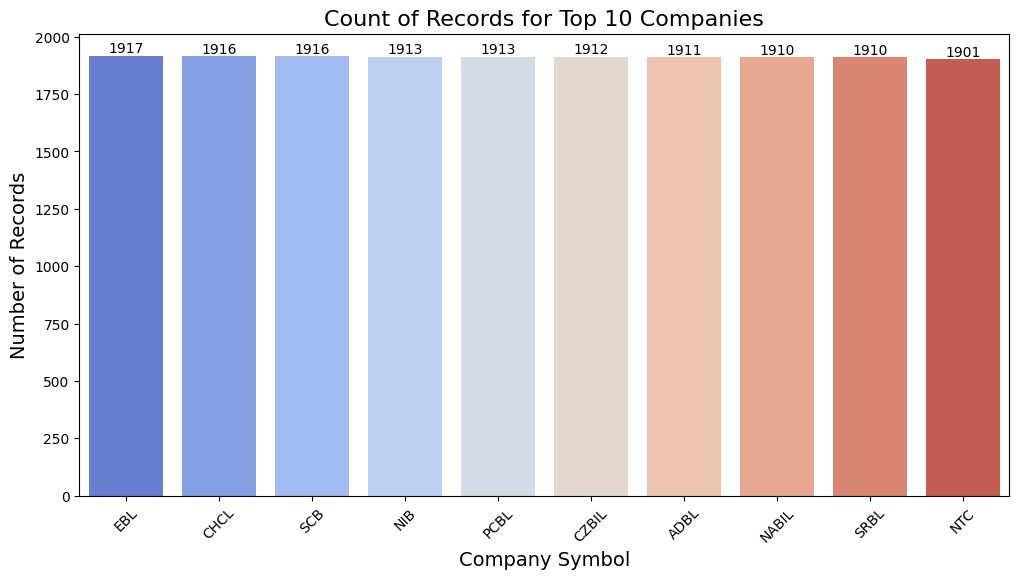

In [ ]:
# Prepare data for visualizations
top_10_data = data[data['Symbol'].isin(top_10_symbols)]

# Count of top companies
count_data = top_10_data['Symbol'].value_counts().reset_index()
count_data.columns = ['Symbol', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='Count', data=count_data, palette='coolwarm')
plt.title('Count of Records for Top 10 Companies', fontsize=16)
plt.xlabel('Company Symbol', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.xticks(rotation=45)
for index, row in count_data.iterrows():
    plt.text(index, row['Count'], f'{row["Count"]}', color='black', ha="center", va='bottom')
plt.show()



<ipython-input-18-570af1054920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['Turnover'] = top_10_data['Close'] * top_10_data['Vol']
<ipython-input-18-570af1054920>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symbol', y='Turnover', data=turnover_data, palette='viridis')


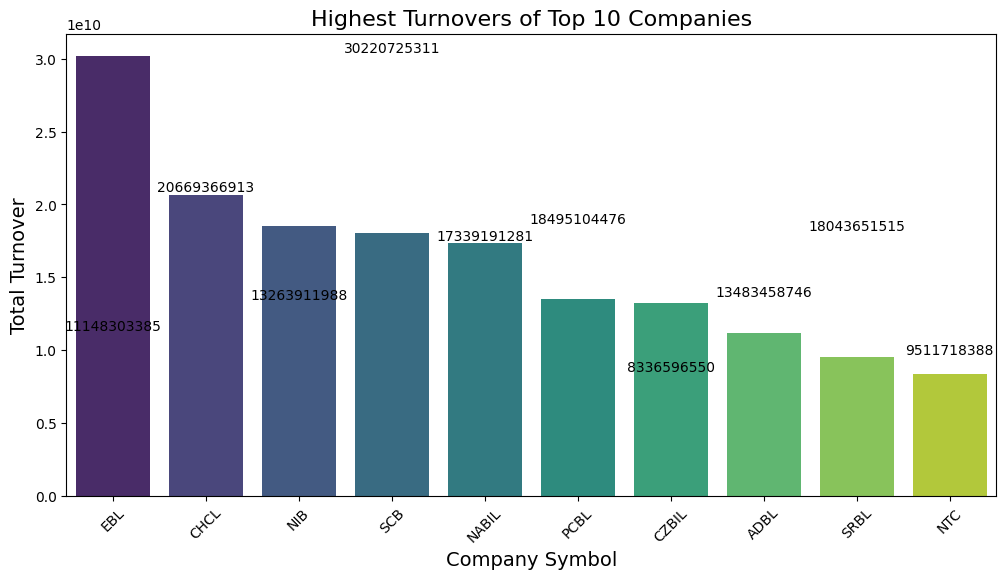

In [ ]:
# Calculate turnovers
top_10_data['Turnover'] = top_10_data['Close'] * top_10_data['Vol']

# Highest turnovers of top 10 companies
turnover_data = top_10_data.groupby('Symbol')['Turnover'].sum().reset_index().sort_values(by='Turnover', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='Turnover', data=turnover_data, palette='viridis')
plt.title('Highest Turnovers of Top 10 Companies', fontsize=16)
plt.xlabel('Company Symbol', fontsize=14)
plt.ylabel('Total Turnover', fontsize=14)
plt.xticks(rotation=45)
for index, row in turnover_data.iterrows():
    plt.text(index, row['Turnover'], f'{row["Turnover"]:.0f}', color='black', ha="center", va='bottom')
plt.show()


<ipython-input-19-363873a89662>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Symbol', y='Vol', data=volume_data, palette='magma')


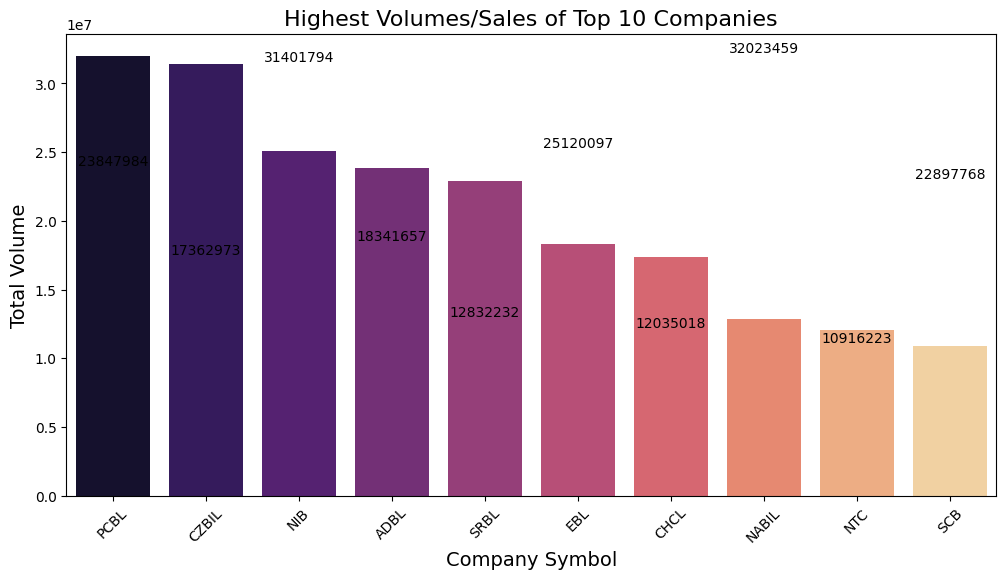

In [ ]:
# Highest volumes/sales of top 10 companies
volume_data = top_10_data.groupby('Symbol')['Vol'].sum().reset_index().sort_values(by='Vol', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Symbol', y='Vol', data=volume_data, palette='magma')
plt.title('Highest Volumes/Sales of Top 10 Companies', fontsize=16)
plt.xlabel('Company Symbol', fontsize=14)
plt.ylabel('Total Volume', fontsize=14)
plt.xticks(rotation=45)
for index, row in volume_data.iterrows():
    plt.text(index, row['Vol'], f'{row["Vol"]:.0f}', color='black', ha="center", va='bottom')
plt.show()


<ipython-input-34-0786b16c5785>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




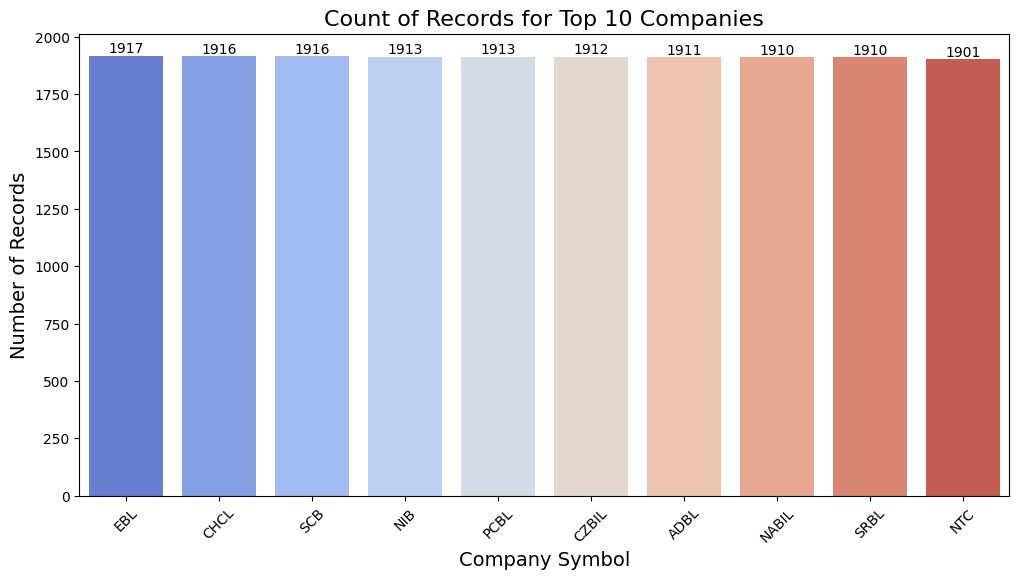

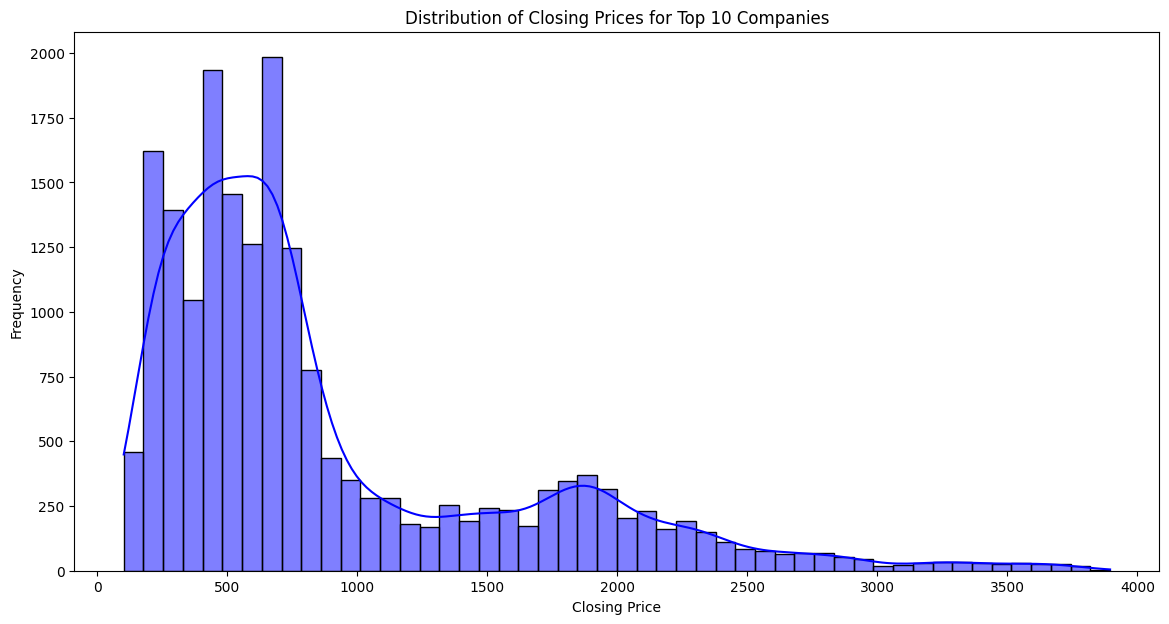

In [ ]:
# Prepare data for visualizations
top_10_data = data[data['Symbol'].isin(top_10_symbols)]


# Plot the distribution of closing prices for top 10 companies
plt.figure(figsize=(14, 7))
sns.histplot(top_10_data['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Closing Prices for Top 10 Companies')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

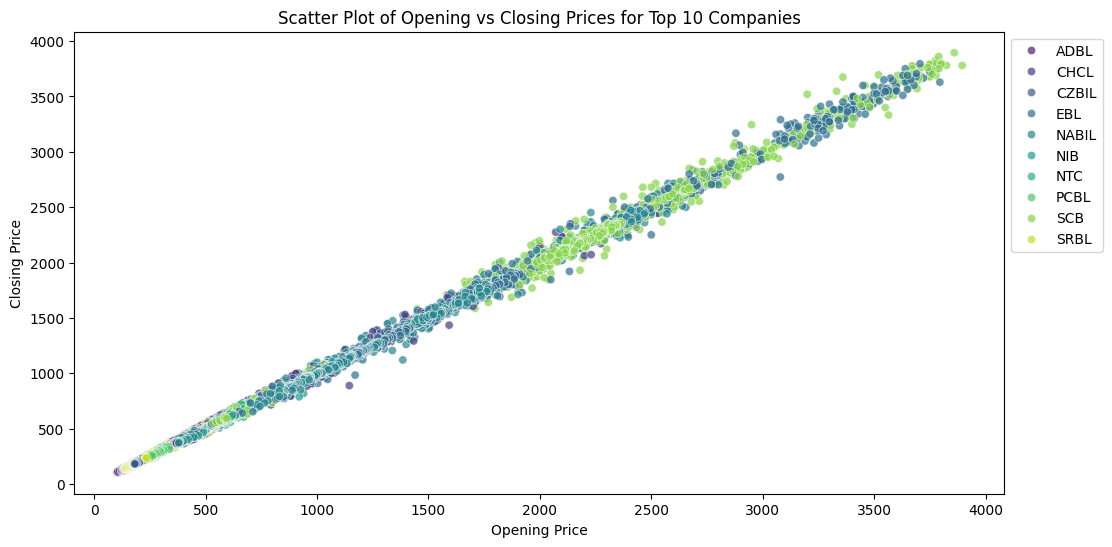

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_10_data, x='Open', y='Close', hue='Symbol', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Opening vs Closing Prices for Top 10 Companies')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-22-d6c768340f9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Symbol', y='Close', data=top_10_data, palette='Set3')


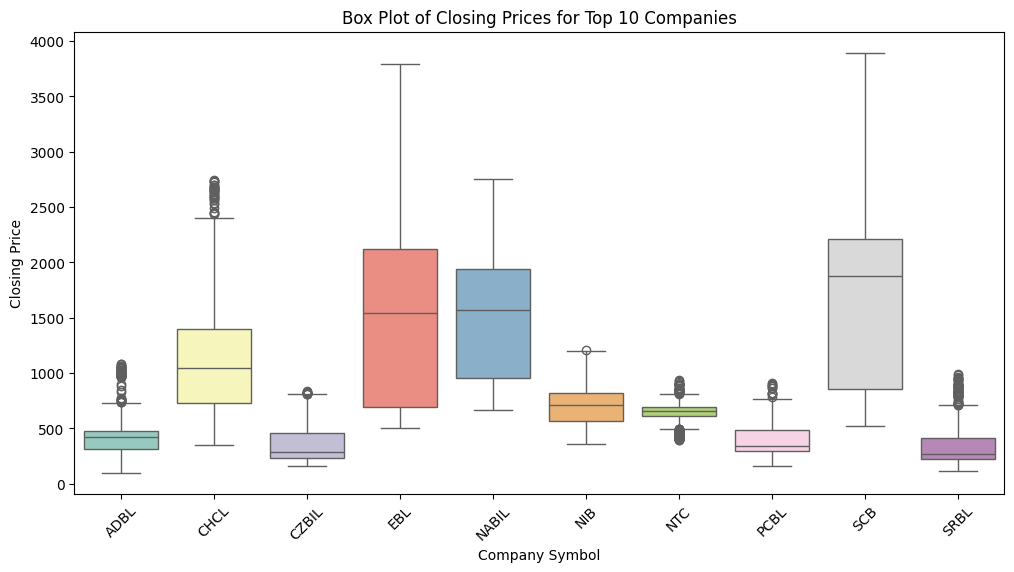

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Symbol', y='Close', data=top_10_data, palette='Set3')
plt.title('Box Plot of Closing Prices for Top 10 Companies')
plt.xlabel('Company Symbol')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()


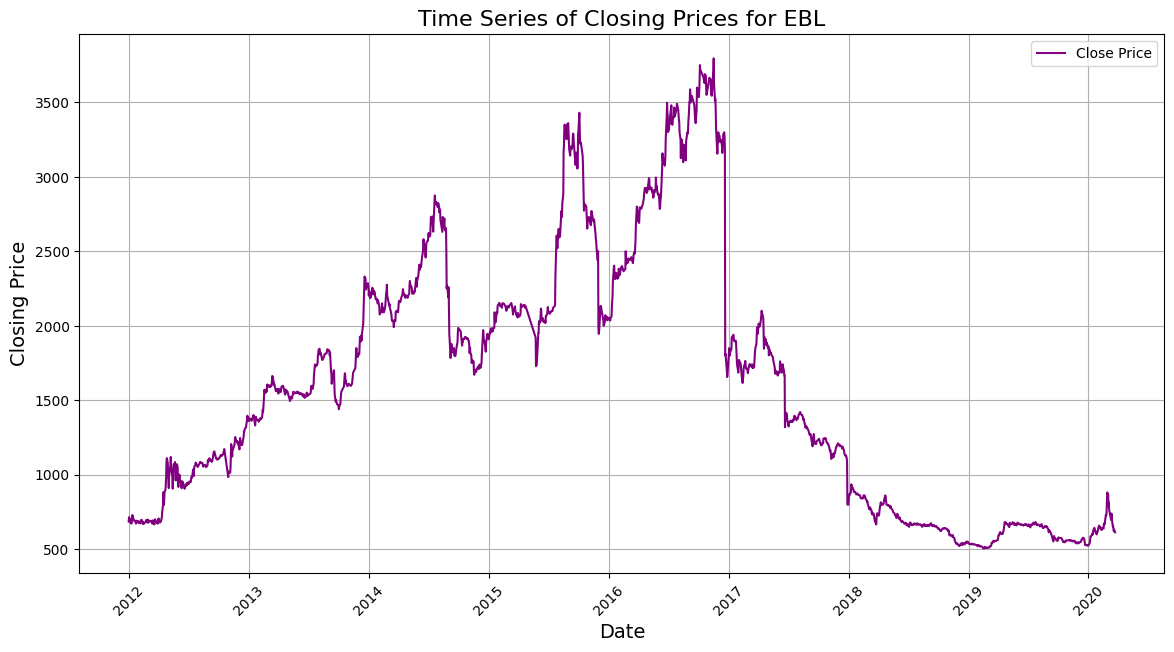

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


sample_company = 'EBL'
sample_data = top_10_data[top_10_data['Symbol'] == sample_company].copy()

# Ensure 'Date' is properly parsed and set as the index
sample_data['Date'] = pd.to_datetime(sample_data['Date'])
sample_data.set_index('Date', inplace=True)

# Plotting the time series of closing prices
plt.figure(figsize=(14, 7))
plt.plot(sample_data.index, sample_data['Close'], label='Close Price', color='purple')
plt.title(f'Time Series of Closing Prices for {sample_company}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


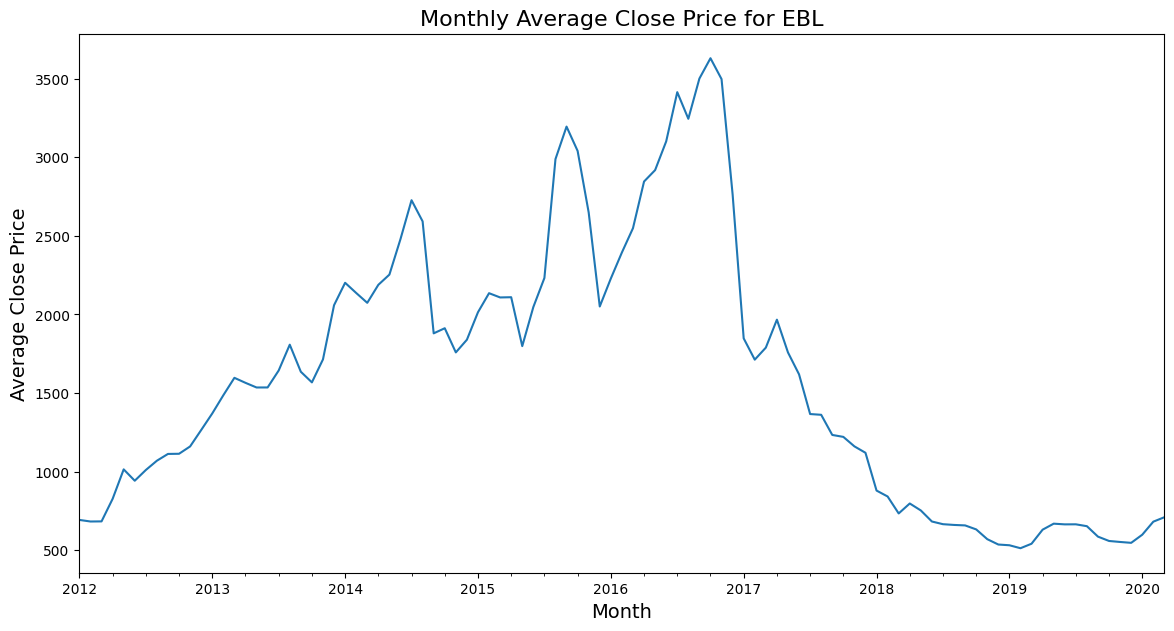

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


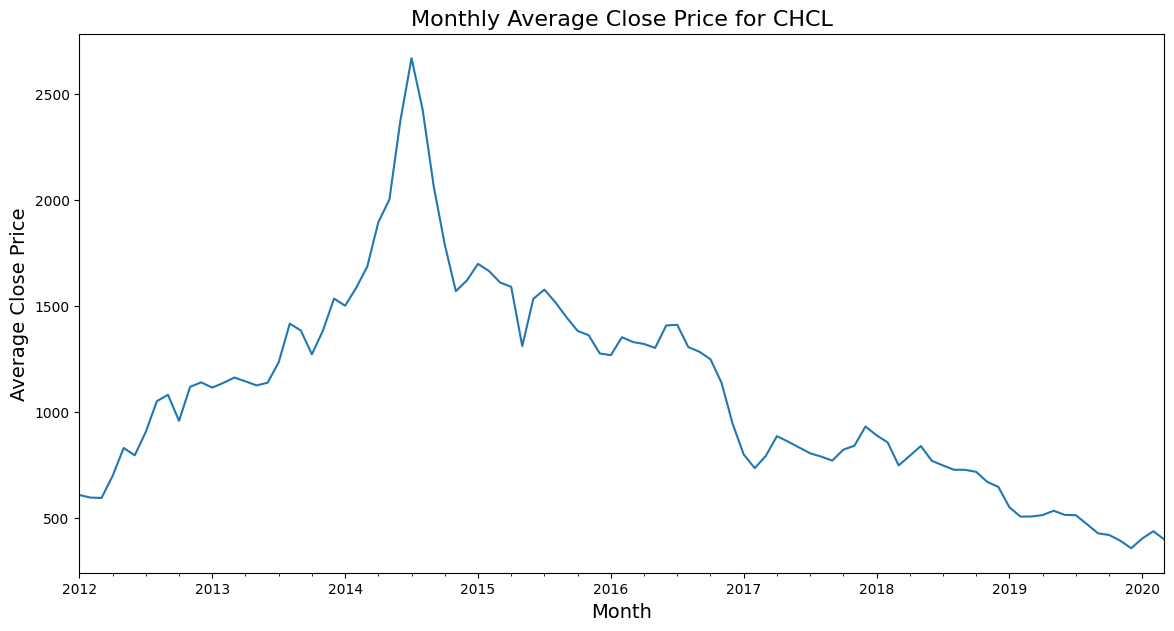

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


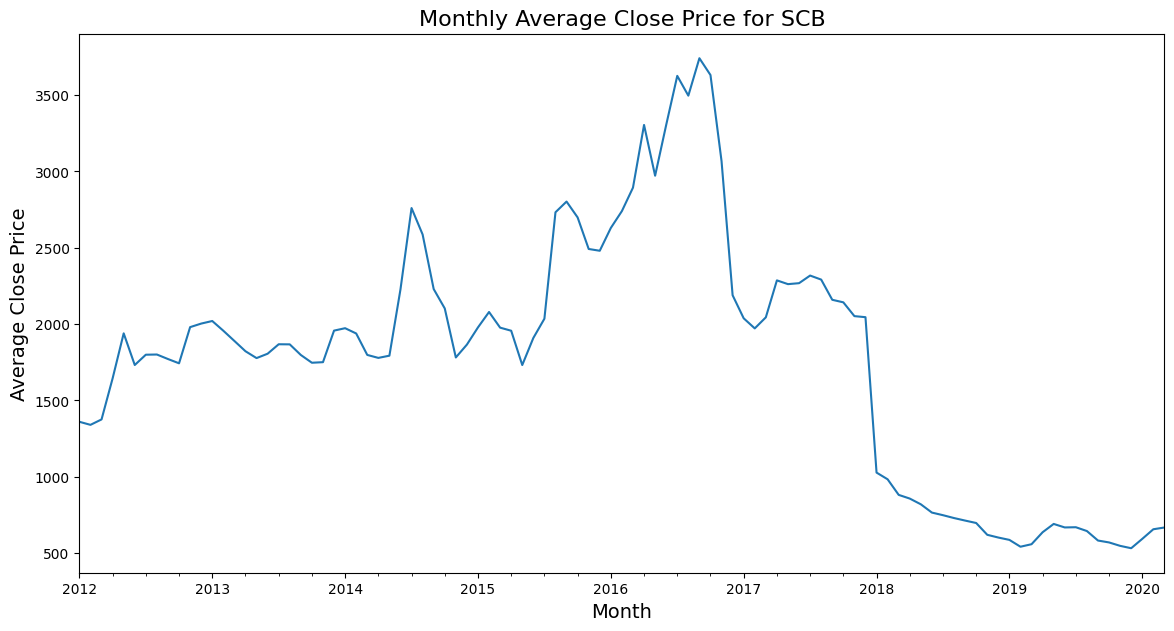

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


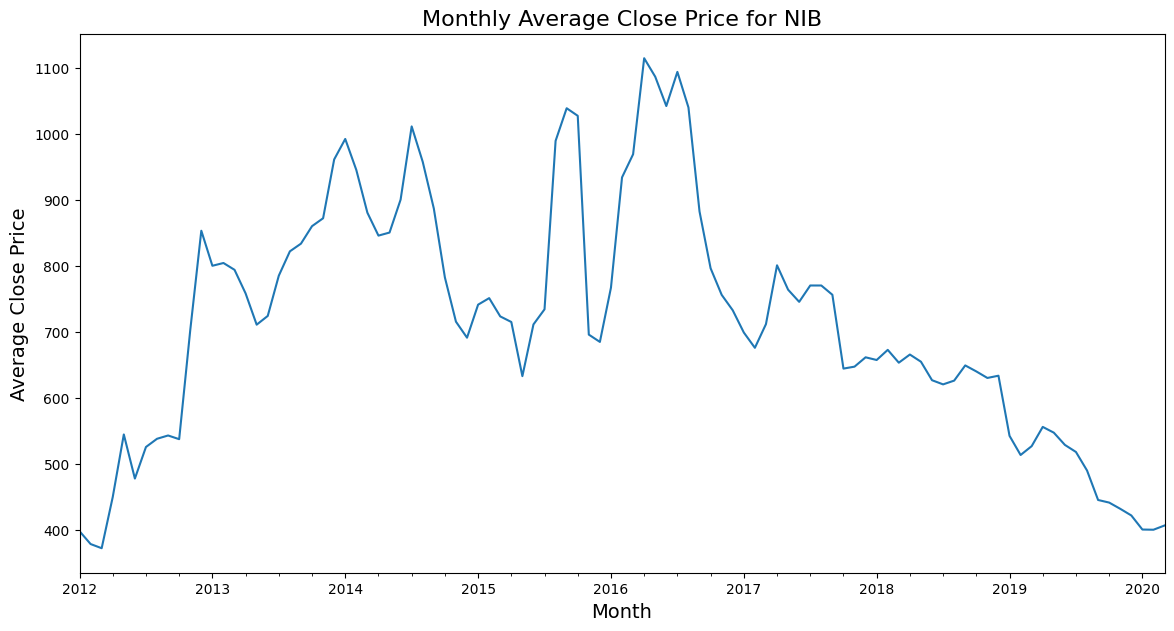

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


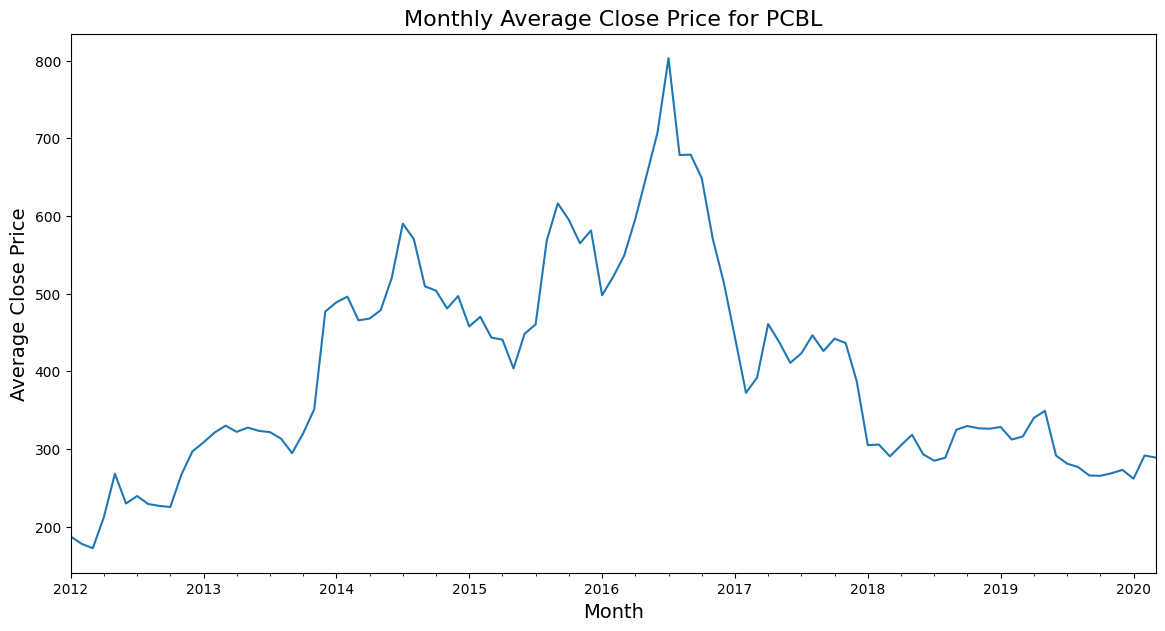

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


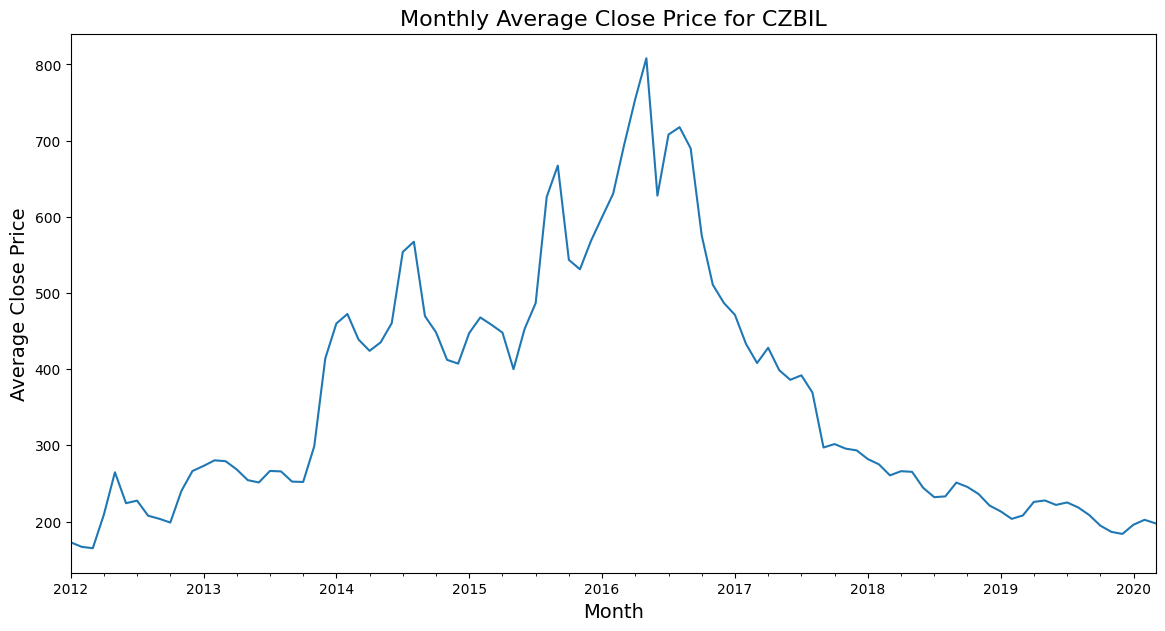

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


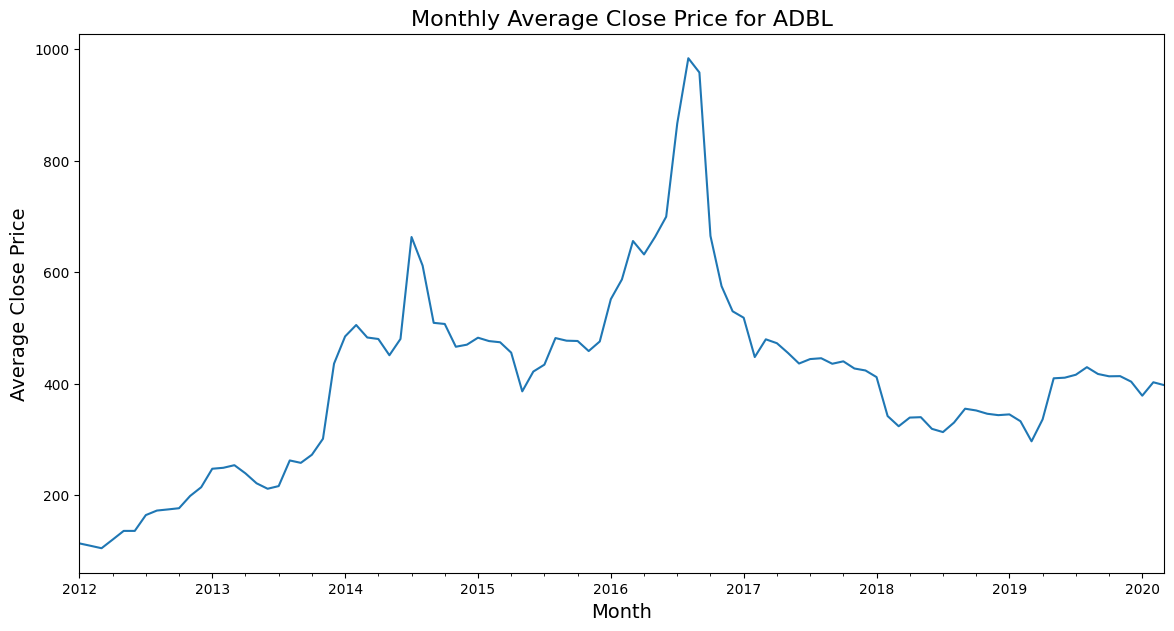

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


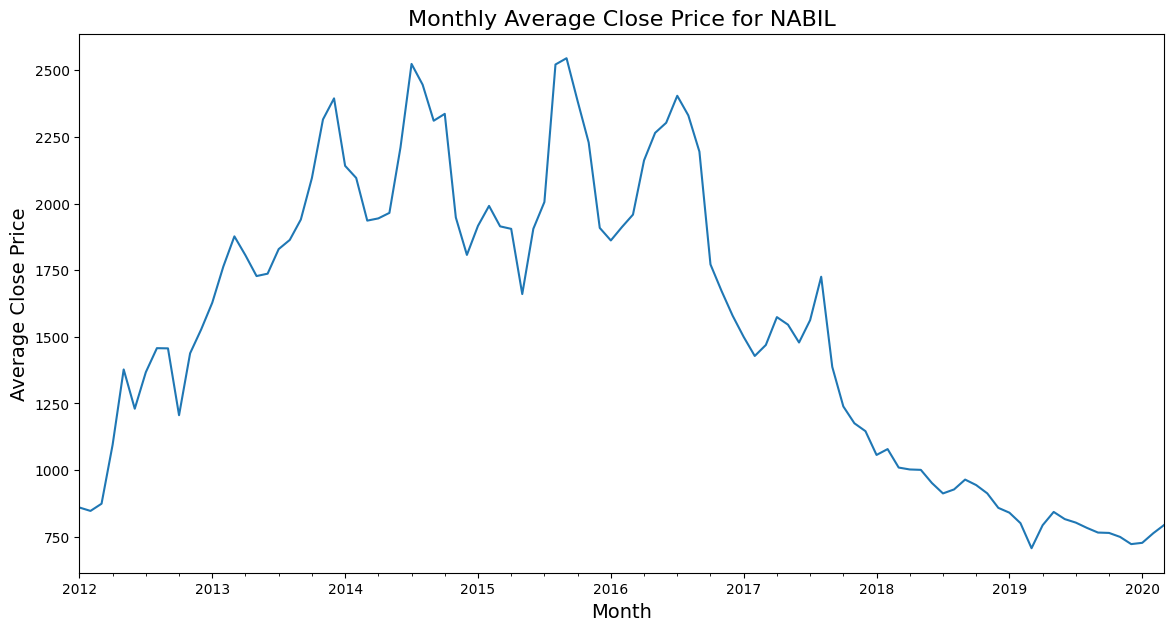

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


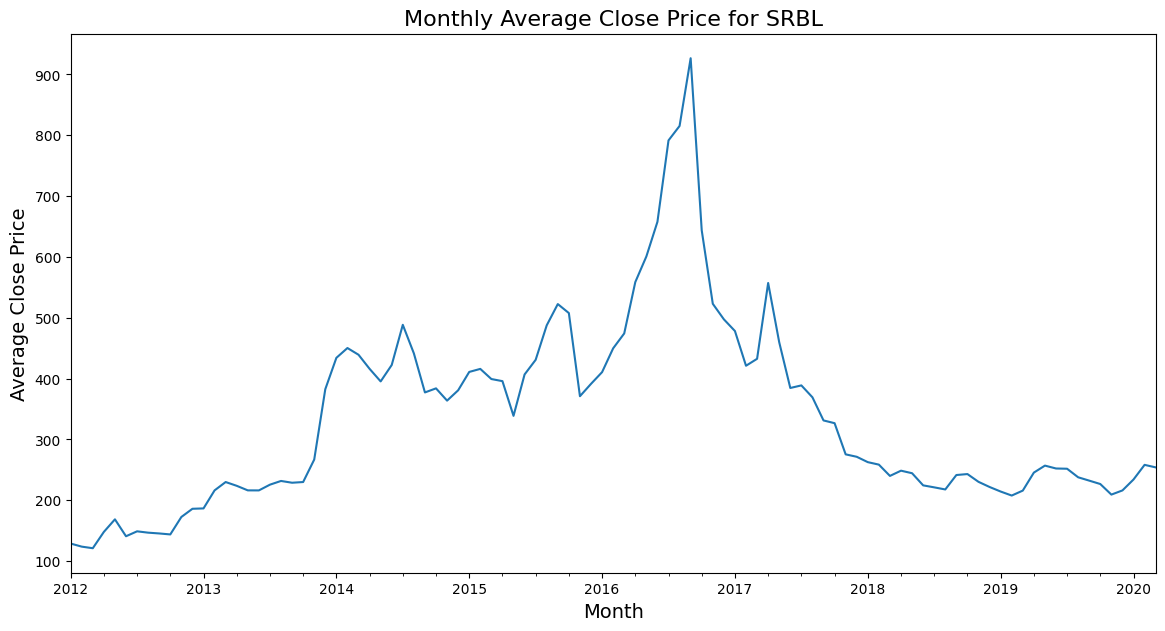

<ipython-input-24-6ccbe4d24425>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')


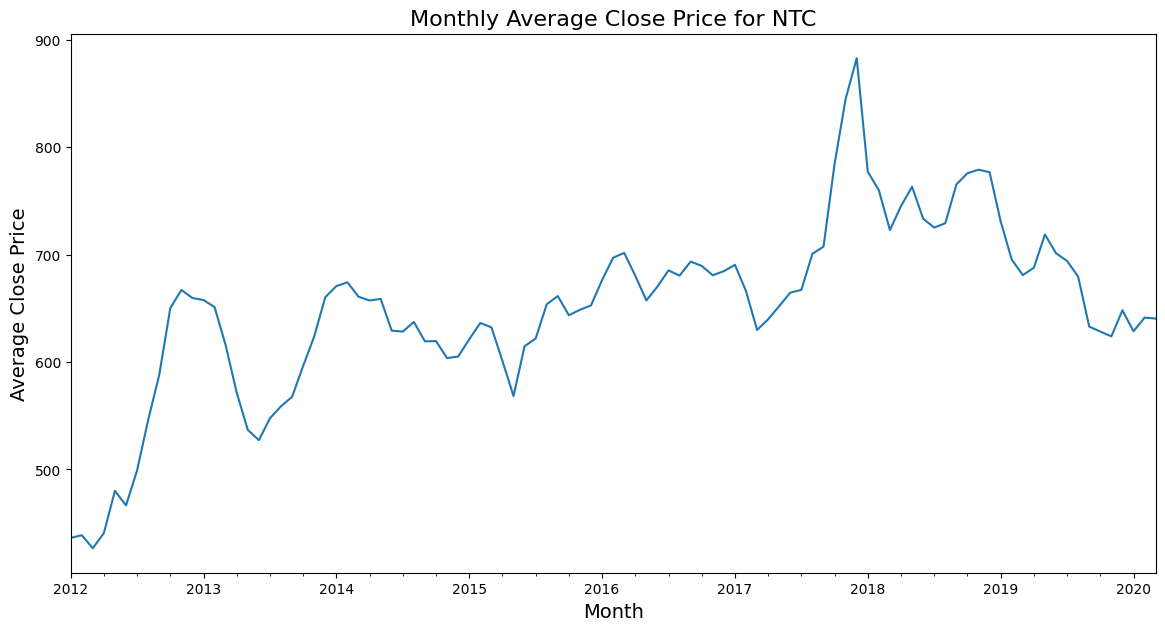

In [ ]:
# Additional plots
#   Monthly average closing prices for each top 10 company
for symbol in top_10_symbols:
    symbol_data = top_10_data[top_10_data['Symbol'] == symbol]
    symbol_data['MonthYear'] = symbol_data['Date'].dt.to_period('M')
    monthly_avg_close = symbol_data.groupby('MonthYear')['Close'].mean()

    plt.figure(figsize=(14, 7))
    monthly_avg_close.plot()
    plt.title(f'Monthly Average Close Price for {symbol}', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Close Price', fontsize=14)
    plt.show()


#Financial charts

1. OHLC chars

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'df' is the DataFrame with the stock data and already loaded
df = pd.read_csv('/content/drive/MyDrive/Stock_market/top_10_companies/EBL.csv')

# Define the symbol for the company
company_symbol = 'EBL'

# Filter data for the company EBL
company_data = data[data['Symbol'] == company_symbol]

# Convert 'Date' column to datetime if not already in datetime format
company_data['Date'] = pd.to_datetime(company_data['Date'])

# Set 'Date' as the index
company_data.set_index('Date', inplace=True)

# Filter the data for the period from 2017 to 2018
filtered_data = company_data['2017-01-01':'2018-12-31']



# Create Enhanced OHLC chart
fig_ohlc = go.Figure(data=go.Ohlc(x=filtered_data.index,
                                  open=filtered_data['Open'],
                                  high=filtered_data['High'],
                                  low=filtered_data['Low'],
                                  close=filtered_data['Close']))

fig_ohlc.update_layout(
    title='OHLC Chart for EBL (2017 to 2018)',
    title_x=0.5,
    xaxis_rangeslider_visible=True,
    xaxis_title="Date",
    yaxis_title="Price",
    width=1000,
    height=600
)

fig_ohlc.show()



<ipython-input-25-f44cf05026ec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date'] = pd.to_datetime(company_data['Date'])


Candlestick chart

In [ ]:
# Create Candlestick chart
fig_candlestick = go.Figure(data=go.Candlestick(x=filtered_data.index,
                                                open=filtered_data['Open'],
                                                high=filtered_data['High'],
                                                low=filtered_data['Low'],
                                                close=filtered_data['Close']))

fig_candlestick.update_layout(
    title='Candlestick Chart for EBL (2017 to 2018)',
    title_x=0.5,
    xaxis_rangeslider_visible=True,
    xaxis_title="Date",
    yaxis_title="Price",
    width=1000,
    height=600
)

fig_candlestick.show()

In [ ]:
# Define a function to create quarterly charts
def create_quarterly_charts(data, company_symbol):
    quarters = pd.date_range(start='2017-01-01', end='2018-12-31', freq='Q')

    for start_date in quarters[:-1]:
        end_date = start_date + pd.DateOffset(months=3) - pd.DateOffset(days=1)
        quarter_data = data[start_date:end_date]

        if not quarter_data.empty:
            # Create OHLC chart for the quarter
            fig_ohlc = go.Figure(data=go.Ohlc(x=quarter_data.index,
                                              open=quarter_data['Open'],
                                              high=quarter_data['High'],
                                              low=quarter_data['Low'],
                                              close=quarter_data['Close']))
            fig_ohlc.update_layout(
                title=f'OHLC Chart for {company_symbol} ({start_date.date()} to {end_date.date()})',
                title_x=0.5,
                xaxis_rangeslider_visible=True,
                xaxis_title="Date",
                yaxis_title="Price",
                width=1000,
                height=600
            )
            fig_ohlc.show()

            # Create Candlestick chart for the quarter
            fig_candlestick = go.Figure(data=go.Candlestick(x=quarter_data.index,
                                                            open=quarter_data['Open'],
                                                            high=quarter_data['High'],
                                                            low=quarter_data['Low'],
                                                            close=quarter_data['Close']))
            fig_candlestick.update_layout(
                title=f'Candlestick Chart for {company_symbol} ({start_date.date()} to {end_date.date()})',
                title_x=0.5,
                xaxis_rangeslider_visible=True,
                xaxis_title="Date",
                yaxis_title="Price",
                width=1000,
                height=600
            )
            fig_candlestick.show()

# Call the function for the company EBL
create_quarterly_charts(filtered_data, company_symbol)
